In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from treeinterpreter import treeinterpreter as ti
import graphviz
import shap

/Users/meichenlu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y_A = np.array([0, 0, 0, 80])
y_B = np.array([0, 0, 10, 90])

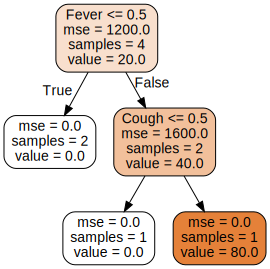

In [3]:
dtreeA = DecisionTreeRegressor(criterion='mse', random_state = 9)
dtreeA.fit(X, y_A)

# draw model
dot_data = export_graphviz(dtreeA, out_file=None, filled=True, rounded=True, feature_names = ['Fever', 'Cough'])  
graph = graphviz.Source(dot_data)  
graph

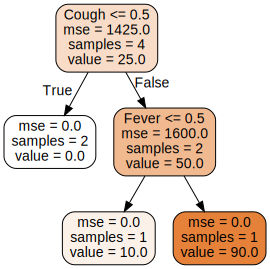

In [4]:
dtreeB = DecisionTreeRegressor()
dtreeB.fit(X, y_B)

# draw model
dot_data = export_graphviz(dtreeB, out_file=None, filled=True, rounded=True, feature_names = ['Fever', 'Cough'])  
graph = graphviz.Source(dot_data)  
# graph.render('Dtree_ModelB', view=True) 
graph

In [5]:
prediction, bias, saabas_A = ti.predict(dtreeA, np.array([[1,1]]))
shapA = shap.TreeExplainer(dtreeA).shap_values(np.array([[1,1]]))
np.r_[shapA, saabas_A]

array([[30., 30.],
       [20., 40.]])

In [6]:
shapA_all = shap.TreeExplainer(dtreeA).shap_values(X)
shapA_mean = np.mean(np.abs(shapA_all), axis = 0)
gainA = dtreeA.feature_importances_
np.r_[[shapA_mean], [gainA]]

array([[20.        , 20.        ],
       [ 0.33333333,  0.66666667]])

In [7]:
prediction, bias, saabas_B = ti.predict(dtreeB, np.array([[1,1]]))
shapB = shap.TreeExplainer(dtreeB).shap_values(np.array([[1,1]]))
np.r_[shapB, saabas_B]

array([[30., 35.],
       [40., 25.]])

In [8]:
shapB_all = shap.TreeExplainer(dtreeB).shap_values(X)
shapB_mean = np.mean(np.abs(shapB_all), axis = 0)
gainB = dtreeB.feature_importances_
np.r_[[shapB_mean], [gainB]]

array([[20.        , 25.        ],
       [ 0.56140351,  0.43859649]])